In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 
import datapane as dp
import altair as alt

In [26]:
def plot_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    plt.plot(in_seq)
    plt.plot(tar_seq)
    plt.plot(predicted_seq)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(['input_seq', 'target_seq', 'pre_seq'], loc='upper right')
    axes = plt.gca()
    fig_predict = plt.figure(figsize=ts)
    plt.show()

In [46]:
corr_group = {
    'P_SUM': #Var to Predict
        ['S_SUM', # Sum of apparent power S1, S2, S3
        'S_L3', # Apparent power S3 
        'S_L2', # Apparent Power S2
        'S_L1', # Apparent power S1
        'C_phi_L1', #Fund power CosPhi factor L1
        'C_phi_L2', #Fund power CosPhi factor L2
        'P_SUM', # Sum of powers P1, P2, P3
        'P_L1', # Real Power 1
        'P_L2', # Real Power 2
        'P_L3', # Real Power 3
        'Q_SUM', # SUm of fund reactive power
        'Q_L1', #Fundamental Reactive Power Q1
        'Q_L2', #Fundamental Reactive Power Q2
        'Q_L3', #Fundamental Reactive Power Q3
        'I_L1', # Current L1
        'I_L2', # Current L2
        'I_L3'], # Current L3
    'U_L1_N':
        ['U_L1_L2', # Voltage L1_l2
        'U_L3_L1', # Voltage L3_l1
        'U_L3_N', # Voltage L3_N
        'U_L2_L3', # Voltage L2_l3
        'U_L2_N', # Voltage L2_N
        'U_L1_N'], # VOltage L1_N 
    'I_SUM': 
        ['I_SUM'], # Current Sum 
    'F': 
        ['F'], # Measured Freq
    'RealE_SUM':
        ['RealEc_SUM', # Sum of Consumed Energy 
        'RealEc_L1', # Real Energy Consumed L1
        'RealEc_L2', # Real Energy Consumed L2
        'RealEc_L3', # Real Energy Consumed L3
        'RealE_SUM', # Sum of Real Energy 
        'RealE_L2', # Real Energy L2
        'RealE_L3', # Real Energy L3
        'RealE_L1', # Real Energy L1
        'AE_SUM', # Apparent Energy Sum
        'AE_L1', # Apparent Energy L1
        'AE_L2', # Apparent Energy L2
        'AE_L3', # Apparent Energy L3
        'ReacE_L1'], #Reactive Energy L1
    'C_phi_L3': 
        ['C_phi_L3'] #Fund power CosPhi factor L3
}

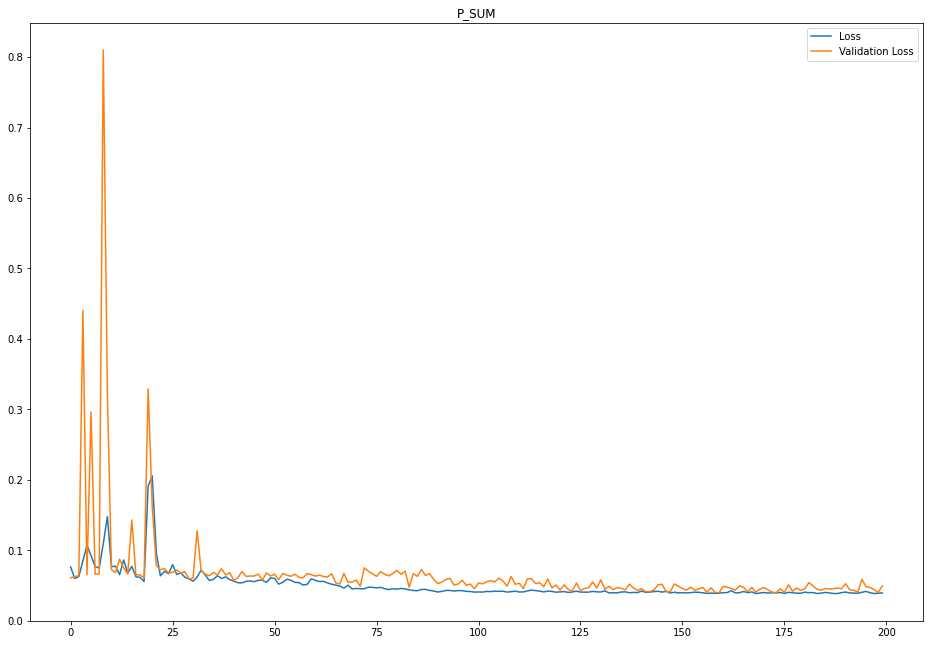

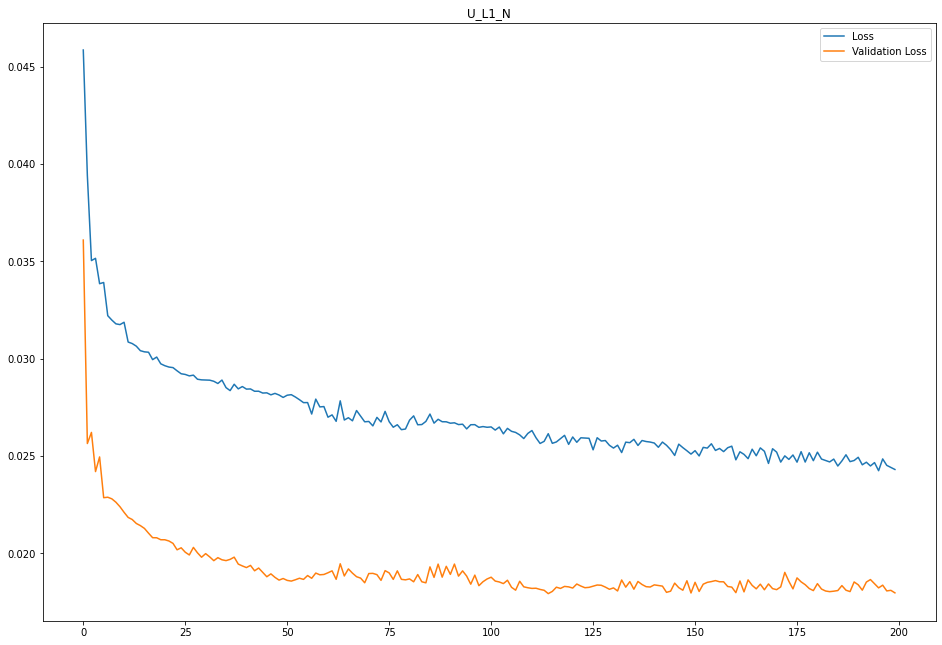

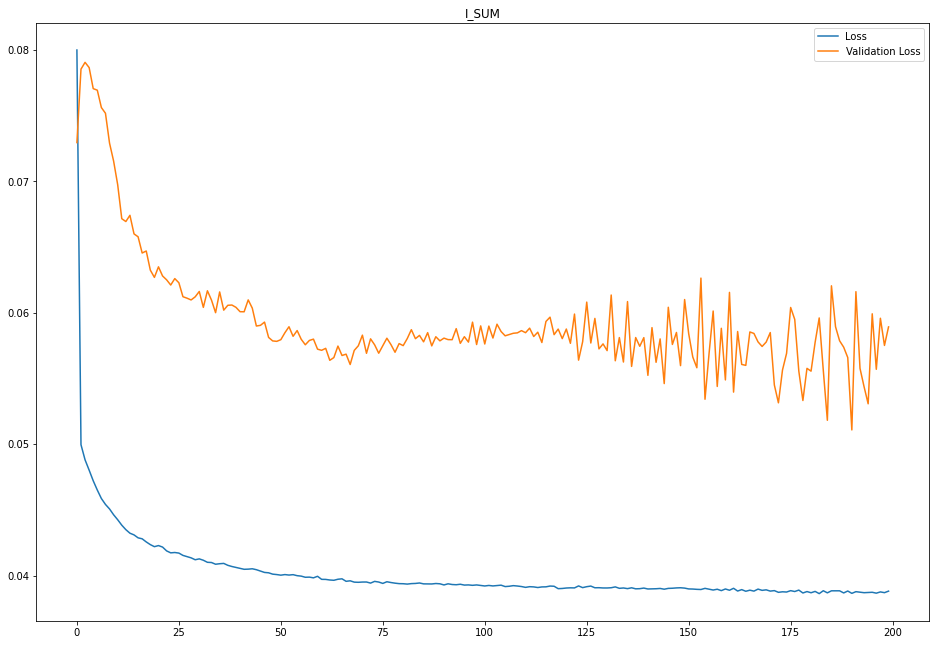

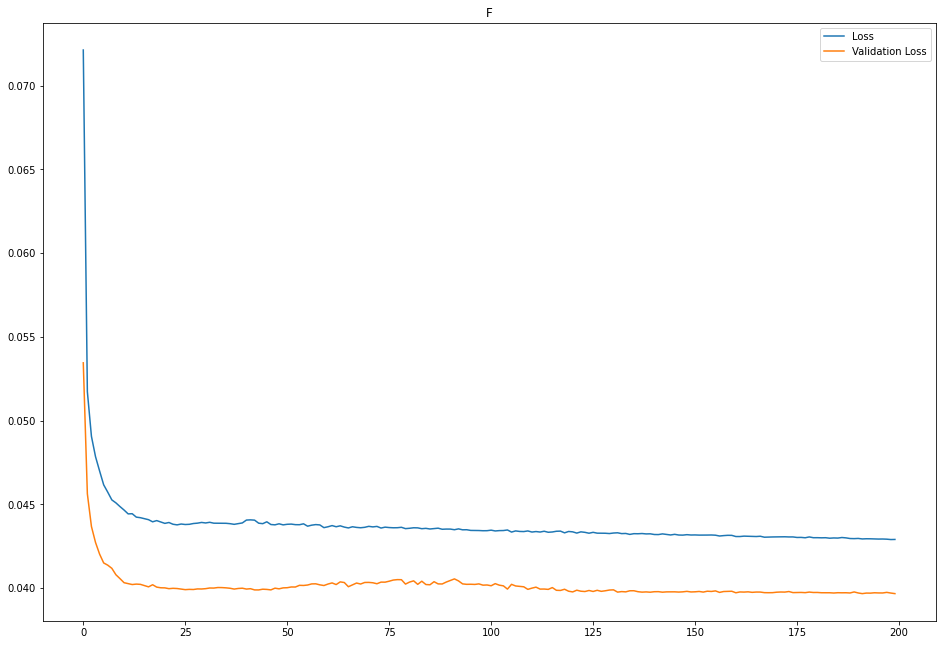

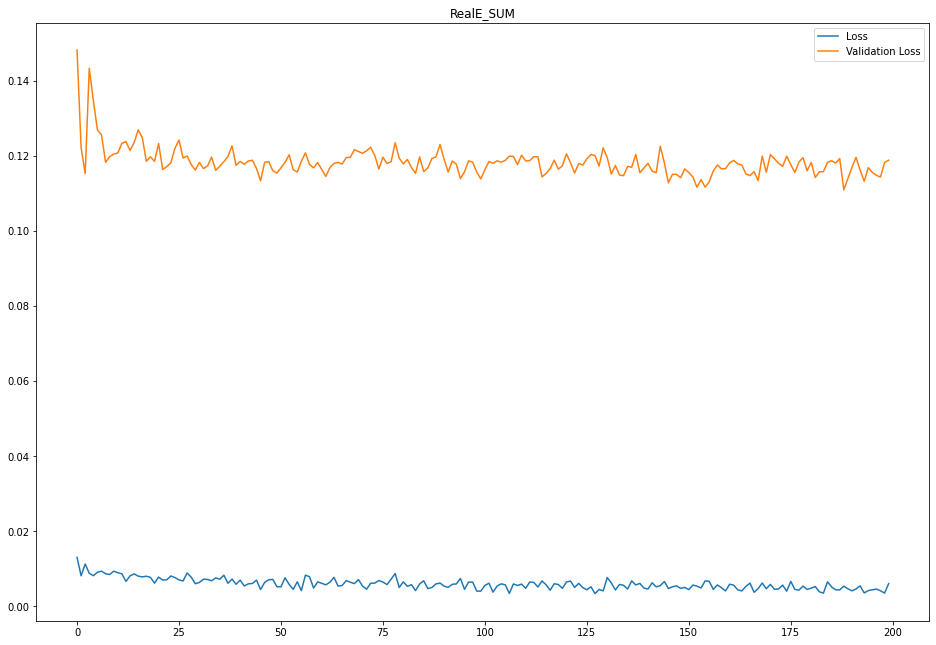

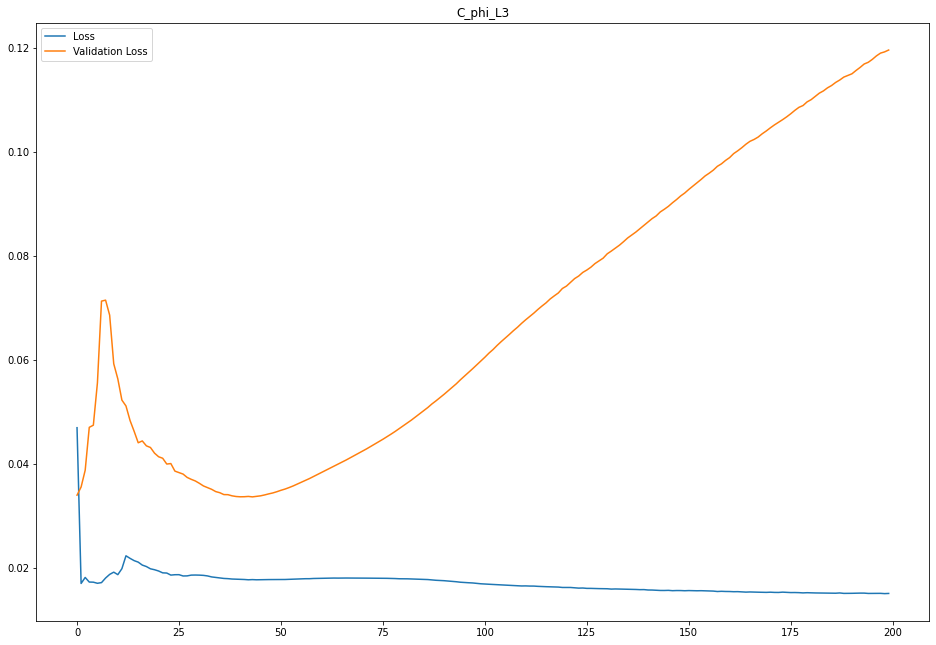

In [60]:
for k in corr_group:
    hist = pd.read_csv('results/Norm_LSTM_60m_'+k+'_history.csv',index_col='Unnamed: 0')
    hist.plot(title=k)

In [48]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
#Remove cols with the same value

def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
print(df.shape)
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_3904\468073868.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1928755, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-03-16T11:46:25.931837314Z,144890.16,408.87,1.08,49.97,407.98,0.97,235.64,44933936,43492684,43453100,...,46857.12,10264.62,50062.00,236.46,47971.05,235.85,203.40,131879832,211.72,198.85
2022-03-16T11:46:27.213046140Z,143902.53,409.29,1.12,49.97,406.56,0.99,234.81,44933952,43492700,43453120,...,47984.26,7155.61,46749.76,236.46,49168.52,235.03,209.20,131879880,197.71,204.36
2022-03-16T11:46:28.499715032Z,143457.63,408.75,1.14,49.97,405.88,0.99,234.87,44933968,43492712,43453132,...,46998.51,7665.49,47098.83,236.24,49360.28,234.77,210.25,131879920,199.37,200.11
2022-03-16T11:46:29.814130324Z,144825.58,408.98,1.09,49.97,408.18,0.97,235.72,44933988,43492732,43453148,...,46598.08,10189.86,49460.64,236.48,48766.86,235.93,206.70,131879976,209.15,197.69
2022-03-16T11:46:31.116579462Z,143771.91,409.67,1.14,49.97,406.51,0.98,235.17,44934000,43492744,43453164,...,47383.55,7984.87,47779.66,236.53,48608.71,234.99,206.85,131880016,202.00,201.49


In [54]:
# Average window
df_2 = df.groupby(np.arange(len(df))//60).mean()
print(df_2.shape)
df_2.head()

(32146, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
0,146344.076833,412.533667,1.055000,50.025667,410.852000,0.984667,237.659333,2.587859e+07,2.517477e+07,2.503666e+07,...,48007.905500,7927.503500,48788.740833,238.315667,49547.431000,237.497000,208.631500,7.609013e+07,204.727167,202.014167
1,146255.934333,413.033667,1.063167,50.016833,411.326500,0.985333,237.906000,2.588038e+07,2.517653e+07,2.503839e+07,...,48109.608833,7822.953500,48646.116333,238.624667,49500.208667,237.713667,208.246000,7.609540e+07,203.868167,202.225167
2,146212.799833,412.486667,1.038000,50.017000,411.097000,0.984167,237.767500,2.588134e+07,2.517748e+07,2.503932e+07,...,48004.779667,8016.505000,48883.147167,238.300167,49324.874167,237.612667,207.593500,7.609825e+07,205.135833,201.903333
3,146342.066167,412.242667,1.021333,50.006833,410.818333,0.983500,237.794167,2.588231e+07,2.517844e+07,2.504025e+07,...,47692.223333,8381.720000,49245.222667,238.209667,49404.619167,237.478667,208.042333,7.610111e+07,206.738167,200.579000
4,145752.608167,411.028833,1.073500,50.009833,409.514167,0.985333,236.878167,2.588327e+07,2.517940e+07,2.504118e+07,...,47807.012667,7659.559833,48889.029500,237.500500,49056.565833,236.737833,207.226333,7.610396e+07,205.851500,201.828000


In [55]:
plt.rcParams["figure.figsize"] = (16,11)

In [56]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(d, columns=df_2.columns, index=df_2.index)
scaled_df.head()

,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
0,0.961624,0.572866,0.738720,0.656327,0.548712,0.992107,0.584476,0.000000,0.000000,0.000000,...,0.947000,0.733971,0.967313,0.556545,0.959357,0.565197,0.964022,0.000000,0.961578,0.941438
1,0.961044,0.591139,0.746424,0.613061,0.566388,0.992779,0.599902,0.000094,0.000096,0.000094,...,0.949009,0.724302,0.964485,0.576135,0.958443,0.579099,0.962240,0.000094,0.957543,0.942423
2,0.960761,0.571148,0.722685,0.613878,0.557839,0.991604,0.591240,0.000144,0.000148,0.000144,...,0.946939,0.742202,0.969184,0.555563,0.955048,0.572619,0.959225,0.000146,0.963497,0.940921
3,0.961610,0.562231,0.706964,0.564082,0.547458,0.990932,0.592908,0.000195,0.000201,0.000195,...,0.940765,0.775978,0.976363,0.549825,0.956592,0.564021,0.961299,0.000197,0.971023,0.934741
4,0.957735,0.517871,0.756170,0.578776,0.498876,0.992779,0.535622,0.000245,0.000253,0.000245,...,0.943032,0.709191,0.969301,0.504866,0.949853,0.516485,0.957529,0.000248,0.966859,0.940569


9643 3211


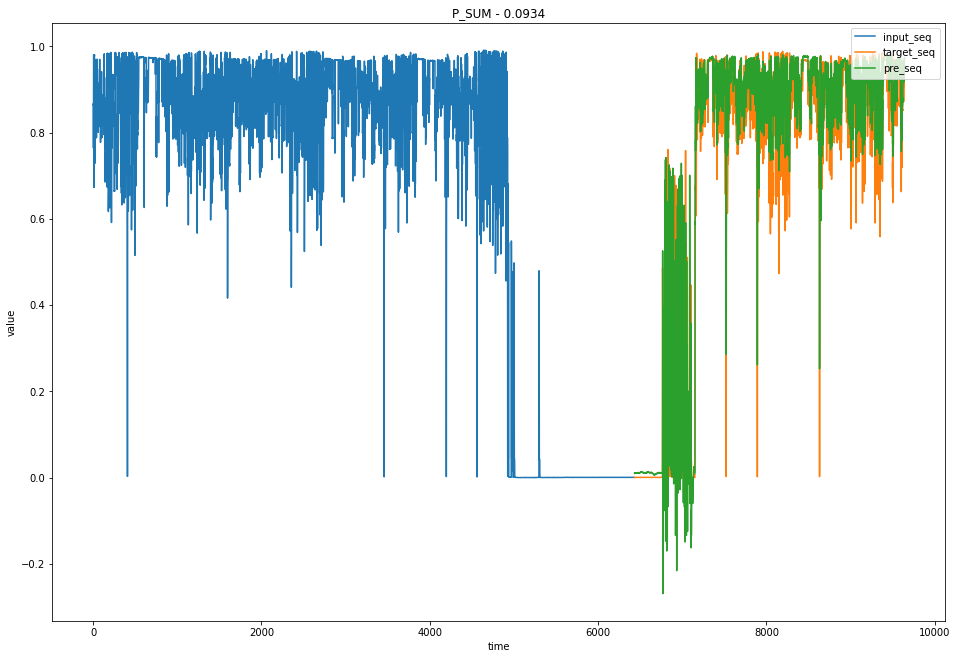

<Figure size 36000x1440 with 0 Axes>

9643 3211


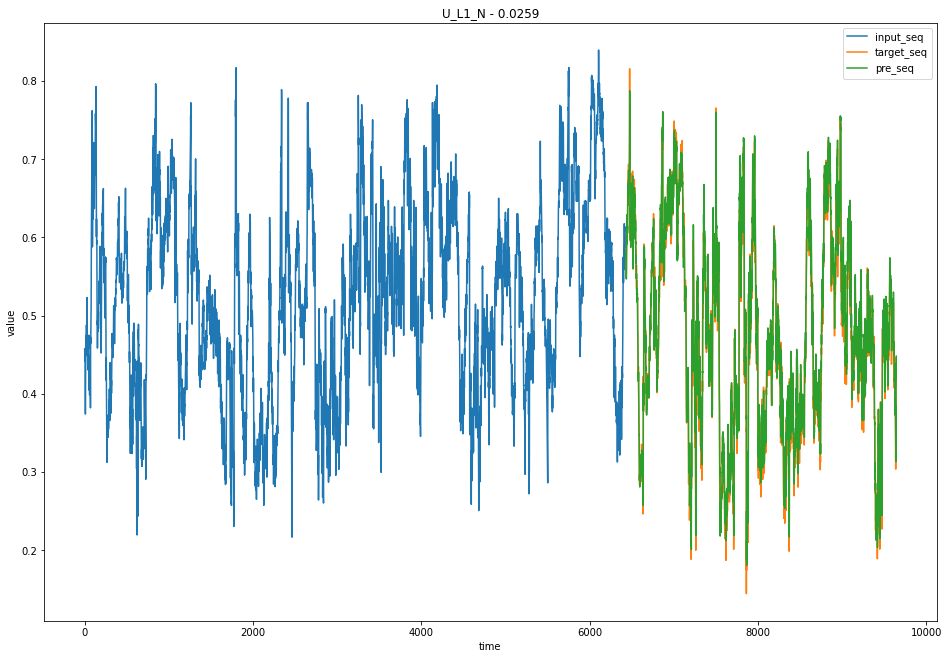

<Figure size 36000x1440 with 0 Axes>

9643 3211


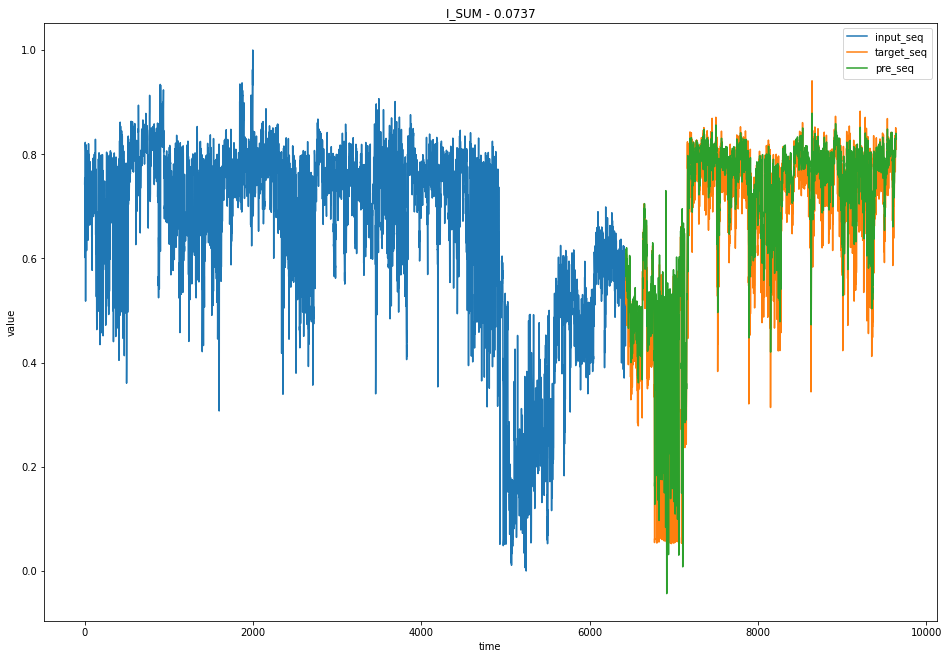

<Figure size 36000x1440 with 0 Axes>

9643 3211


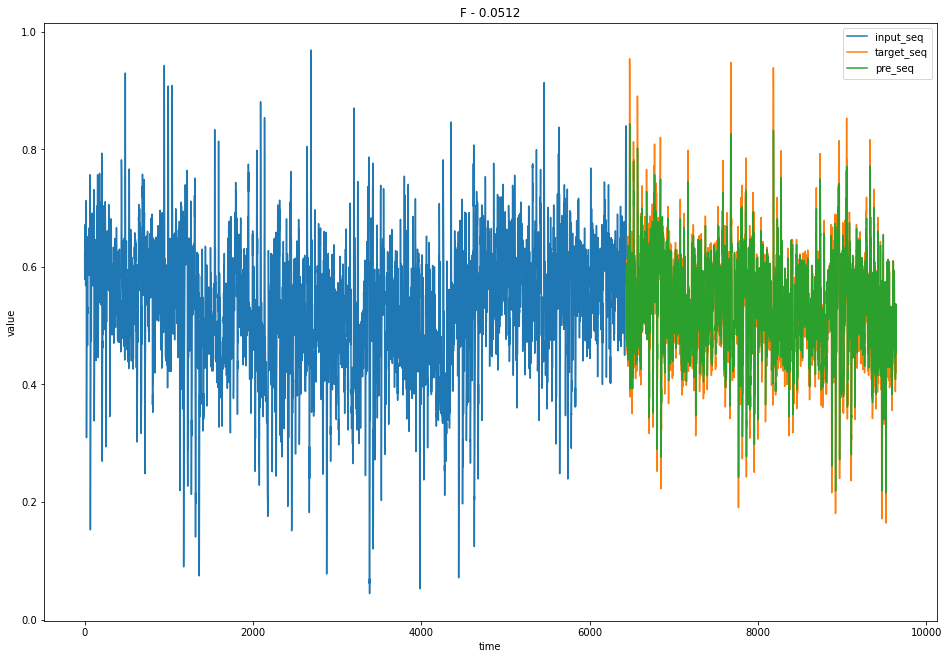

<Figure size 36000x1440 with 0 Axes>

9643 3211


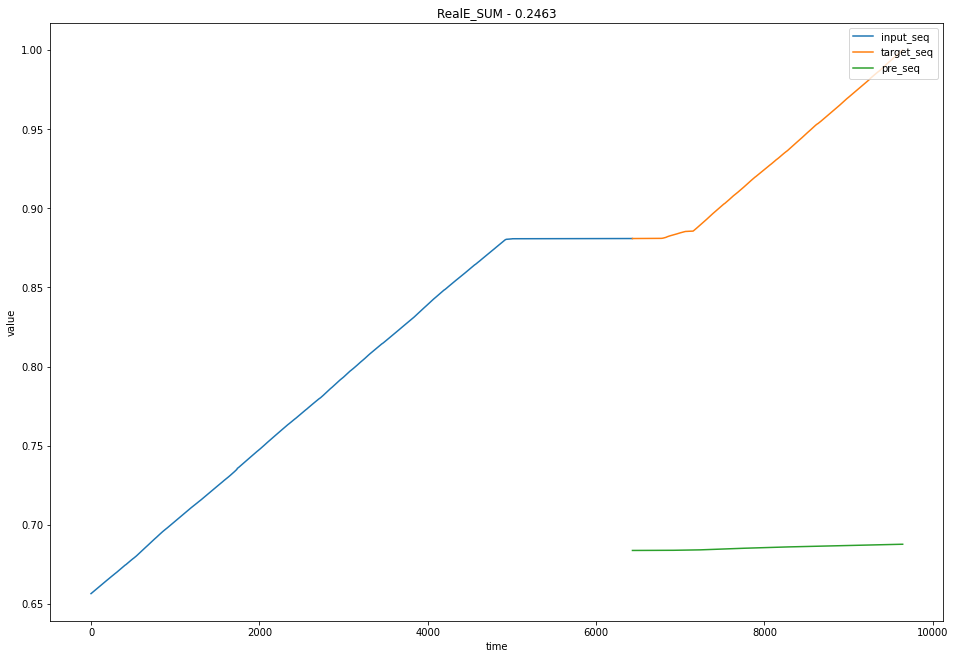

<Figure size 36000x1440 with 0 Axes>

9643 3211


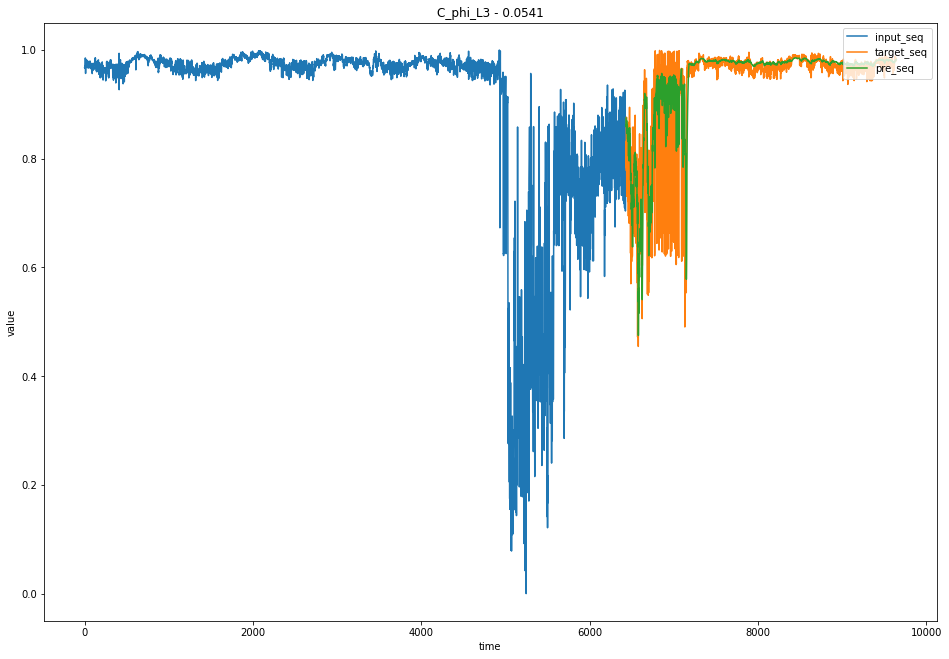

<Figure size 36000x1440 with 0 Axes>

In [61]:
vals = scaled_df.shape[0]
# Average window
history_window = int(0.3*vals)
for k in corr_group:
    fc = pd.read_csv('results/Norm_LSTM_60m_'+k+'_predict.csv',index_col='Unnamed: 0').values[:,0]
    prediction_window = len(fc)
    print(history_window, prediction_window)
    hist = scaled_df[k].values[-history_window:-prediction_window]
    test = scaled_df[k].values[-prediction_window:]
    rmse = np.sqrt(mean_squared_error(test, fc))
    plot_forecasts(hist, test, fc, title=f"{k} - {rmse:.4f}", ts=(500,20))


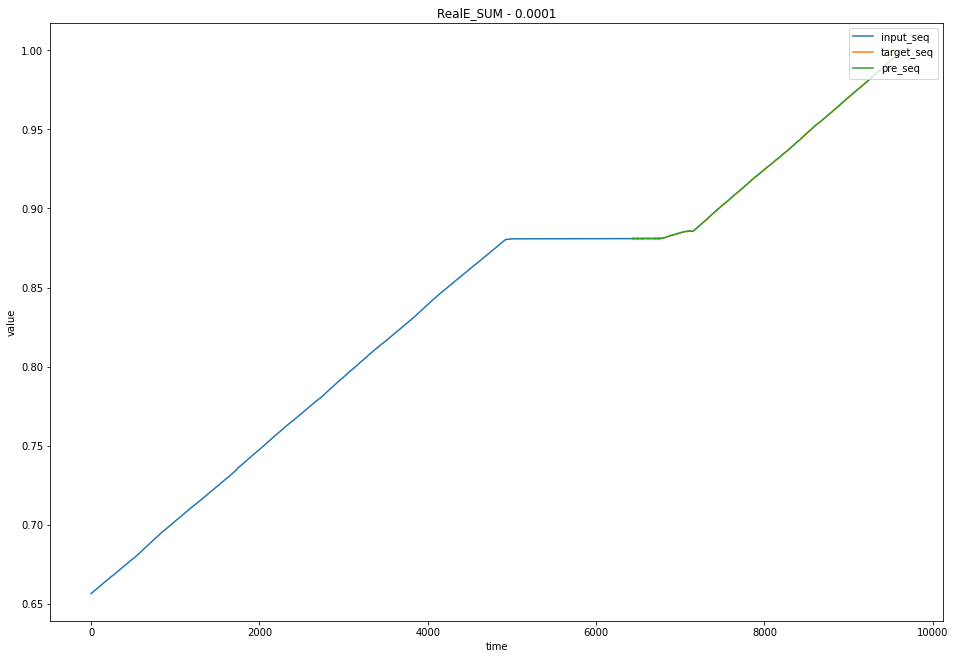

<Figure size 36000x1440 with 0 Axes>

In [58]:
from sklearn.metrics import mean_squared_error


fc = pd.read_csv('results/Spec_Norm_LSTMRealE_SUMpredict.csv',index_col='Unnamed: 0').values[:,0]
prediction_window = len(fc)
hist = scaled_df['RealE_SUM'].values[-history_window:-prediction_window]
test = scaled_df['RealE_SUM'].values[-prediction_window:]
rmse = np.sqrt(mean_squared_error(test, fc))
plot_forecasts(hist, test, fc, title=f"RealE_SUM - {rmse:.4f}", ts=(500,20))


In [ ]:
pred = pd.read_csv("results/PCA_LSTM40_Drop_60secs_MSE_prediction.csv", index_col='Unnamed: 0').transpose()
fc = pred.values
for i in range(len(cols)):
    rmse = np.sqrt(mean_squared_error(test[:,i], fc[:,i]))
    print("%.4f" % rmse)
